In [1]:
import pandas as pd
import numpy as np
import os
import shap
import json
import matplotlib.pyplot as plt

from dataloader.dataset import Dataset

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
results_dir = "/Volumes/methlab/Students/Jonathan/results/runs/2024_kw34/20240821_0753_5ff6_feature_sets_cv/20240821_0816_manual_linguistic_features_gpt_5features_slnu"

In [3]:
shap_values_raw = np.load(os.path.join(results_dir, "shap_values.npy"))

In [4]:
test_data = Dataset.from_disk(os.path.join(results_dir, "dataset")).data
feature_names = test_data.columns.tolist()
feature_names

Created object of class <class 'dataloader.dataset.TabularDataset'>: Dataset Concatenate(ADReSS manual transcripts (train) - Linguistic Features, ADReSS manual transcripts (test) - Linguistic Features) with variables [('data', (156, 45)), ('sample_names', (156,)), ('labels', (156,))], config ({'preprocessors': ['Linguistic Features'], 'debug': False, 'cv_shuffler': <dataloader.cv_shuffler.ADReSSCrossValidationShuffler object at 0x106ceee50>, 'transcript_config': {'only_PAR': True, 'keep_pauses': False, 'keep_terminators': True, 'keep_unintelligable_speech': False, 'insert_pauses_automatic': False}, 'transcript_config_hash': 'ee5faf'})


['lit_pronoun_noun_ratio',
 'lit_verb_noun_ratio',
 'lit_subordinate_coordinate_conjunction_ratio',
 'lit_adverb_ratio',
 'lit_noun_ratio',
 'lit_verb_ratio',
 'lit_pronoun_ratio',
 'lit_personal_pronoun_ratio',
 'lit_determiner_ratio',
 'lit_preposition_ratio',
 'lit_verb_present_participle_ratio',
 'lit_verb_modal_ratio',
 'lit_verb_third_person_singular_ratio',
 'lit_NP -> PRP',
 'lit_ADVP -> RB',
 'lit_NP -> DT_NN',
 'lit_ROOT -> FRAG',
 'lit_VP -> VBG',
 'lit_VP -> VBG_PP',
 'lit_VP -> VBD_NP',
 'lit_INTJ -> UH',
 'lit_NP_ratio',
 'lit_PRP_ratio',
 'lit_PP_ratio',
 'lit_VP_ratio',
 'lit_avg_n_words_in_NP',
 'lit_n_words',
 'lit_n_unique_words',
 'lit_avg_word_length',
 'lit_avg_sentence_length',
 'lit_words_not_in_dict_ratio',
 'lit_brunets_index',
 'lit_honores_statistic',
 'lit_ttr',
 'lit_mattr',
 'lit_flesch_kincaid',
 'lit_avg_distance_between_utterances',
 'lit_prop_utterance_dist_below_05',
 'lit_propositional_density',
 'lit_content_density',
 'Semantic Paraphasias',
 'Imp

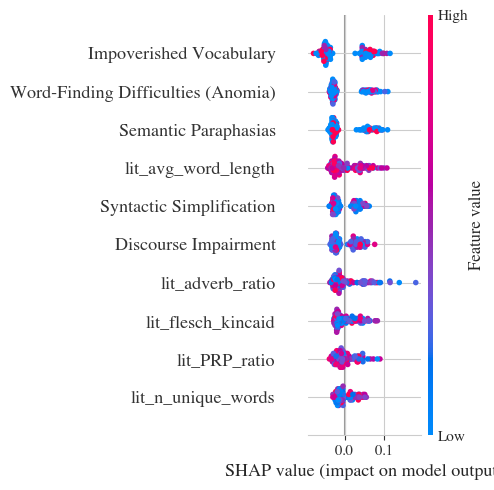

In [5]:
from matplotlib import rc, font_manager
rc('font',**{'family':'serif','serif':['Times']})

shap.summary_plot(shap_values_raw, test_data, plot_size=(5,5), max_display=10, feature_names=[c for c in test_data.columns], show=False)
plt.tight_layout()
csfont = {'fontname':'Times', 'size':14}

ax = plt.gca()
#ax.set_xlabel(ax.xaxis.get_label().get_text(), loc="right", **csfont) 
#for label in ax.get_yticklabels():
#    label.set_fontproperties({'family': 'Times', 'size': 14})
plt.savefig("plots/feature_importance_shap.pdf")
plt.show()


In [6]:
shap_values = pd.DataFrame(shap_values_raw, columns=test_data.columns)
shap_values

,lit_pronoun_noun_ratio,lit_verb_noun_ratio,lit_subordinate_coordinate_conjunction_ratio,lit_adverb_ratio,lit_noun_ratio,lit_verb_ratio,lit_pronoun_ratio,lit_personal_pronoun_ratio,lit_determiner_ratio,lit_preposition_ratio,...,lit_flesch_kincaid,lit_avg_distance_between_utterances,lit_prop_utterance_dist_below_05,lit_propositional_density,lit_content_density,Semantic Paraphasias,Impoverished Vocabulary,Discourse Impairment,Word-Finding Difficulties (Anomia),Syntactic Simplification
0,-0.010831,-0.001793,-0.000377,-0.004094,-0.007960,0.004953,-0.008704,-0.020324,-0.010440,0.012629,...,0.076615,0.037192,0.002457,-0.005320,-0.008090,-0.020685,-0.042509,-0.024756,-0.023399,-0.026581
1,0.010790,0.000807,-0.000203,0.049610,0.014910,0.004333,-0.007609,-0.007175,-0.002285,0.005433,...,-0.011285,0.002729,-0.000766,-0.004414,0.007416,0.062711,0.064664,0.034070,0.053707,0.043466
2,-0.002288,-0.000828,-0.000934,-0.000364,-0.012830,0.006153,-0.002509,-0.003182,0.003108,-0.002416,...,0.012396,0.007953,0.008300,0.009601,0.000367,0.063777,0.072724,0.046853,0.057238,0.044119
3,-0.008949,-0.003066,0.001133,0.006934,-0.015769,0.004530,-0.007049,-0.009271,-0.000049,0.000531,...,0.018425,-0.000127,-0.003095,-0.006682,-0.007194,0.080680,0.098618,0.041127,0.060625,0.052542
4,-0.010947,-0.004365,-0.000780,-0.029062,-0.018892,0.007479,-0.005951,-0.026464,-0.004612,0.001963,...,0.059420,-0.006161,0.013559,0.020097,-0.004284,-0.020047,-0.045193,-0.019698,-0.022114,-0.025834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.020509,0.004730,-0.000390,0.040038,0.017120,0.000217,0.006807,0.027318,0.016360,0.003549,...,0.024356,-0.002801,0.000574,-0.001742,0.006436,0.060342,0.048075,0.025201,0.046515,0.023527
152,-0.011475,-0.003656,-0.001447,-0.016271,0.003761,-0.001544,-0.006940,-0.018384,-0.003577,-0.006030,...,-0.014912,-0.006697,-0.006687,-0.007531,-0.003530,-0.036314,-0.050602,-0.022183,-0.028914,-0.022496
153,-0.005018,0.009756,-0.001556,-0.011027,0.017245,-0.007957,-0.002390,-0.011841,-0.008395,-0.003624,...,-0.019270,-0.006488,0.005451,0.002315,-0.004889,-0.031739,-0.052177,-0.015764,-0.030011,-0.021594
154,-0.006108,-0.003460,0.000515,-0.022400,0.012235,-0.009291,-0.004435,0.004742,0.003406,0.016227,...,-0.010946,-0.009503,-0.005741,-0.008696,-0.002146,-0.030933,0.042881,-0.016491,-0.024758,-0.020658


In [7]:
mean_abs_shap = shap_values.abs().mean(axis=0).sort_values(ascending=False).reset_index()
mean_abs_shap.columns = ('Feature name', 'Mean absolute\\\\&SHAP value')
mean_abs_shap

,Feature name,Mean absolute\\&SHAP value
0,Impoverished Vocabulary,0.054227
1,Word-Finding Difficulties (Anomia),0.039491
2,Semantic Paraphasias,0.037741
3,lit_avg_word_length,0.028548
4,Syntactic Simplification,0.027661
5,Discourse Impairment,0.026865
6,lit_adverb_ratio,0.026495
7,lit_flesch_kincaid,0.021346
8,lit_PRP_ratio,0.019452
9,lit_n_unique_words,0.017239


In [8]:
mean_abs_shap_latex = mean_abs_shap.copy()
mean_abs_shap_latex['Feature name'] = [i.replace("lit_", "").replace("_", "\_") for i in mean_abs_shap_latex['Feature name']]
mean_abs_shap_latex.iloc[:,1] = mean_abs_shap_latex.iloc[:,1].apply(lambda x: f"{x:.3f}")
print(mean_abs_shap_latex.iloc[:10].to_latex(index=False))

\begin{tabular}{ll}
\toprule
Feature name & Mean absolute\\&SHAP value \\
\midrule
Impoverished Vocabulary & 0.054 \\
Word-Finding Difficulties (Anomia) & 0.039 \\
Semantic Paraphasias & 0.038 \\
avg\_word\_length & 0.029 \\
Syntactic Simplification & 0.028 \\
Discourse Impairment & 0.027 \\
adverb\_ratio & 0.026 \\
flesch\_kincaid & 0.021 \\
PRP\_ratio & 0.019 \\
n\_unique\_words & 0.017 \\
\bottomrule
\end{tabular}

